## Supervised Learning - Building a Student Performance Prediction System  

# Question 1 
#### The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Drop missing values.

4.Transform Data

5.Drop variables with less variance

6.Encode all categorical variables to numerical

7.Convert the continuous values of grades into classes

8.Apply the models.

9.Visualization

10.Provide insights.

11.Training and testing data split

12.Model Implementation and Testing the Accuracy

## Question 1 - Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
#Upload the csv file to colab, incase you're working on jupyter
# directly read the csv using pandas.read_csv()
import numpy as np
import pandas as pd
studentData = pd.read_csv("students-data.csv", delimiter =';')

In [2]:
# Read dataset using pandas and print few rows
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#print the columns in the dataframe
studentData.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Question 3 - drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
studentData.index.name = 'number'

studentData.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Transform Data

# Question 4

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

# Answer:

In [5]:
# cat_columns = studentData.select_dtypes(exclude=np.number).columns
cat_columns = studentData.select_dtypes(include=['object']).columns
print(cat_columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## Question 5 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [6]:
num_columns = studentData.select_dtypes(include=['int64']).columns

In [7]:
col_var = studentData.var()
cols_drop = col_var[col_var.values < 1].index
studentData.drop(columns=cols_drop, axis=1, inplace=True)

In [8]:
studentData.shape

(395, 27)

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 6 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in cat_columns:
    studentData[column] = le.fit_transform(studentData[column])

## Question 7 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [10]:
studentData['G1'] = studentData['G1'].apply(lambda x: 0 if x < 10 else 1)
studentData['G2'] = studentData['G2'].apply(lambda x: 0 if x < 10 else 1)
studentData['G3'] = studentData['G3'].apply(lambda x: 0 if x < 10 else 1)
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 8 - Apply the models.
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [11]:
# Target values are G3
X = studentData.drop('G3', axis=1)
Y = studentData[['G3']]
# Feature set is remaining features
print(X.shape, Y.shape)

(395, 26) (395, 1)


## Visualization

## Question 9

*Plot G2 and G3 and give your understanding on relation between both variables.*

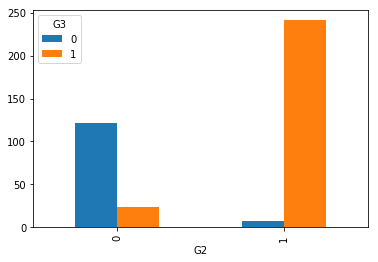

In [13]:
pd.crosstab(studentData.G2, studentData.G3).plot(kind="bar")


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 10

*Plot the number of students in each school and number of students with different ages in separate plots.*

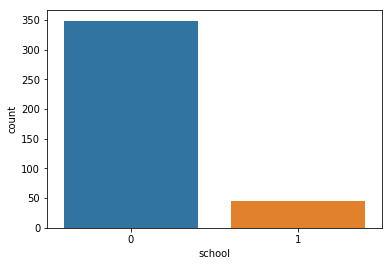

In [14]:
import seaborn as sns
sns.countplot(x="school", data=studentData)

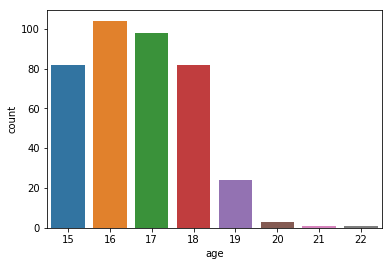

In [15]:
sns.countplot(x="age", data=studentData)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## Question 11 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [17]:
from sklearn.model_selection import  train_test_split
# Set the number of training points
num_train = 300

# Set the number of testing points
num_test = 95

# Shuffle and split the dataset into the number of training and testing points above

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=95, random_state=1)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Question 12 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression, Naive Bayes and KNN** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

Logistic Regression

In [18]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print("What is the Testing Accuracy")
print(lr.score(X_test,Y_test))
print("What is the Training Accuracy")
print(lr.score(X_train,Y_train))
Y_pred = lr.predict(X_test)
f1_score = f1_score(Y_test,Y_pred)
accuracy_score = accuracy_score(Y_test,Y_pred)
print("f1 score:{} and accuracy : {}".format(f1_score,accuracy_score))

What is the Testing Accuracy
0.9052631578947369
What is the Training Accuracy
0.9333333333333333
f1 score:0.931297709923664 and accuracy : 0.9052631578947369


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes Classifier

In [21]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
print("What is the Testing Accuracy")
print(gnb.score(X_test,Y_test))
print("What is the Training Accuracy")
print(gnb.score(X_train,Y_train))
Y_pred = gnb.predict(X_test)
#f1_score = f1_score(Y_test,Y_pred)
#accuracy_score = accuracy_score(Y_test,Y_pred)
#print("f1 score:{} and accuracy : {}".format(f1_score,accuracy_score))

What is the Testing Accuracy
0.8842105263157894
What is the Training Accuracy
0.8966666666666666


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K-neighbours Classifier

In [22]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,Y_train)
print("What is the Testing Accuracy")
print(knc.score(X_test,Y_test))
print("What is the Training Accuracy")
print(knc.score(X_train,Y_train))
Y_pred = knc.predict(X_test)
#f1_score = f1_score(Y_test,Y_pred)
#accuracy_score = accuracy_score(Y_test,Y_pred)
#print("f1 score:{} and accuracy : {}".format(f1_score,accuracy_score))

What is the Testing Accuracy
0.7578947368421053
What is the Training Accuracy
0.8633333333333333


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
